## About the dataset

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. It is publicly available in the UCI Machine Learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set/code?select=bank_cleaned.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bank_cleaned.csv')
data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [3]:
data.drop(columns=['Unnamed: 0','response_binary'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        40841 non-null  int64  
 1   job        40841 non-null  object 
 2   marital    40841 non-null  object 
 3   education  40841 non-null  object 
 4   default    40841 non-null  object 
 5   balance    40841 non-null  int64  
 6   housing    40841 non-null  object 
 7   loan       40841 non-null  object 
 8   day        40841 non-null  int64  
 9   month      40841 non-null  object 
 10  duration   40841 non-null  float64
 11  campaign   40841 non-null  int64  
 12  pdays      40841 non-null  int64  
 13  previous   40841 non-null  int64  
 14  poutcome   40841 non-null  object 
 15  response   40841 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.0+ MB


### Bank client data:

+ age: age of the client (intiger)
+ job: type of job (categorical)
+ marital: marital status (categorical)
+ education: educational level of the client (categorical)
+ default: has credit in default? (binary: 'no','yes')
+ balance: the amount of money owed on an account.
+ housing: has housing loan? (binary: 'no','yes')
+ loan: has personal loan? (binary: 'no','yes')
+ contact: contact communication type (binary/categorical)
+ day: day of the month
+ month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
+ duration: last contact duration, in seconds (numeric)
+ campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
+ pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
+ previous: number of contacts performed before this campaign and for this client (numeric)
+ poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success')
+ response: has responded? (binary: 'no','yes')

Data are actually cleaned.

I will split the project into 2 subprojects:
+ The first one based on Housing Credit using columns such as age, job, marital status, education, default and personal loan
+ The second one based on the response using more columns.

For both subprojects I will start with some Exploratory Data Analysis (EDA) and I will continue with Machine Learning techniques for classification. I start using pure classification algorithms and I continue with clustering to make predictions based on unlabeled data and then PCA to run faster the classification algorithms.

## Subproject 1: Predicting if a client will take housing credit

First of all, I copy the data into a new dataframe and drop the columns that I don't need anymore.

In [4]:
data_1 = data.copy()
data_1.drop(columns=['day','month','duration','campaign','pdays','previous','poutcome','response'], 
            axis=1, inplace=True)
data_1

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,35,management,married,tertiary,no,231,yes,no
4,28,management,single,tertiary,no,447,yes,yes
...,...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,no,505,no,yes
40837,51,technician,married,tertiary,no,825,no,no
40838,71,retired,divorced,primary,no,1729,no,no
40839,72,retired,married,secondary,no,5715,no,no


I will categorize the columns into numerical, categorical and numerical

In [5]:
numerical_columns_1, categorical_columns_1, binary_columns_1 = list(), list(), list()
for x in data_1.columns:
    if data_1[x].dtype in ['float','int']:
        numerical_columns_1.append(x)
    else:
        if len(data_1[x].value_counts())>2:
            categorical_columns_1.append(x)
        else:
            binary_columns_1.append(x)

I will start with some basic **EDA** on some columns

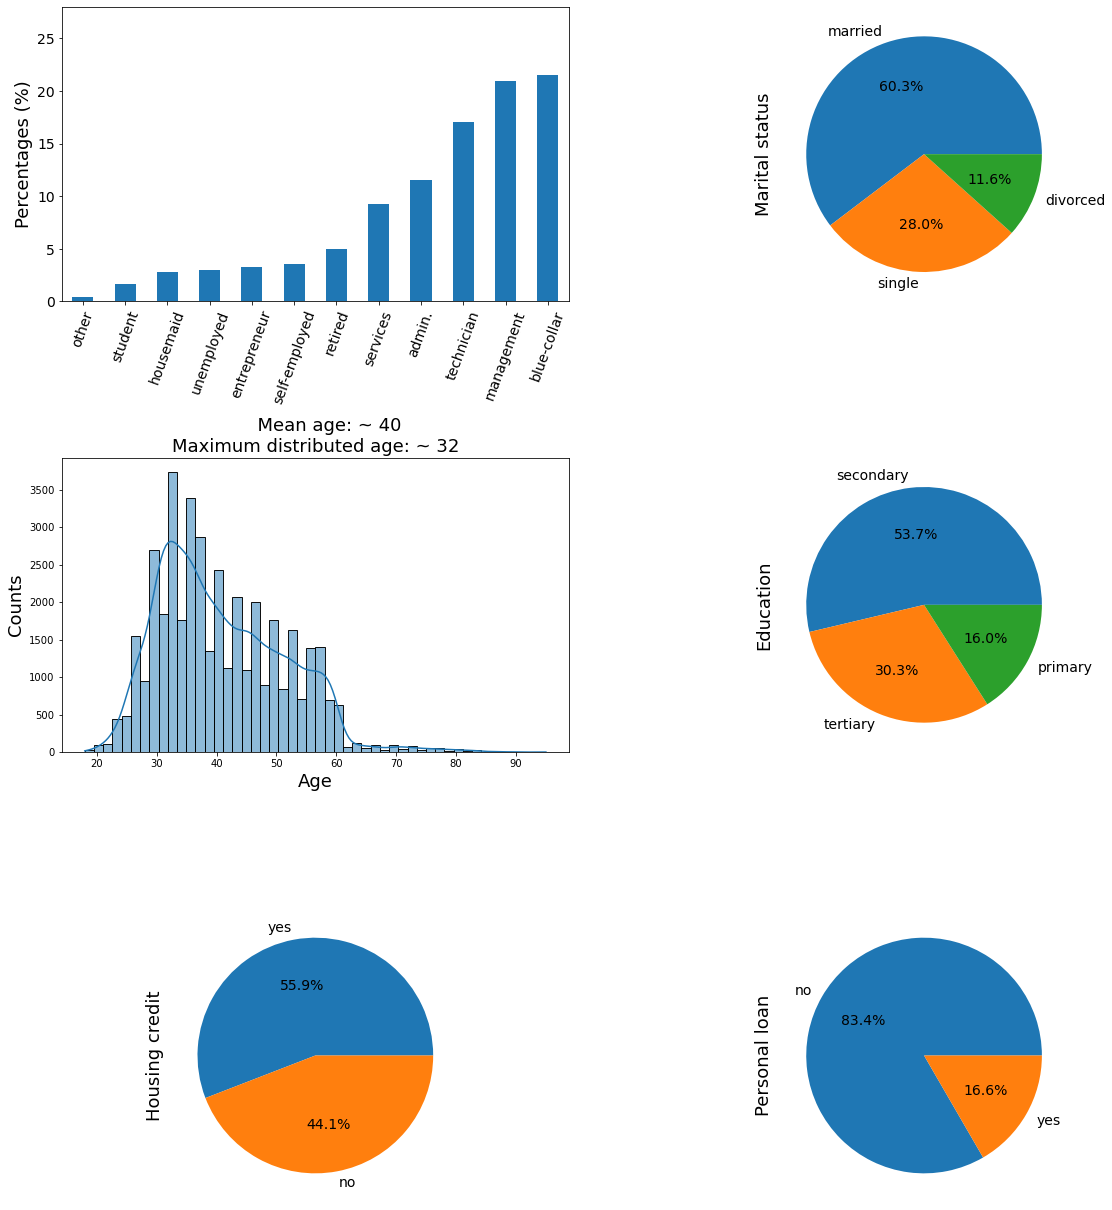

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(20,22))
ax = ax.flatten()
plt.subplots_adjust(hspace=0.53)

##########################################################################################################
##########---------------------------------  1st row, 1st plot  --------------------------------##########
##########################################################################################################

(data_1.job.value_counts(normalize=True, ascending=True)*100).plot.bar(ax=ax[0])
ax[0].set_ylabel('Percentages (%)', fontsize=18)
x_ticks=np.arange(len(data_1.job.value_counts().tolist()))
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(data_1.job.value_counts().keys()[::-1], fontsize=14, rotation=70)
y_ticks = [0,5,10,15,20,25]
ax[0].set_yticks(y_ticks)
ax[0].set_yticklabels(y_ticks,fontsize=14)
ax[0].set_ylim(0,28)

##########################################################################################################
##########---------------------------------  1st row, 2nd plot  --------------------------------##########
##########################################################################################################

(data_1.marital.value_counts(normalize=True)*100).plot.pie(ax=ax[1], 
                                                         autopct='%.1f%%', fontsize=14)
ax[1].set_ylabel('Marital status', fontsize=18)

##########################################################################################################
##########---------------------------------  2nd row, 1st plot  --------------------------------##########
##########################################################################################################

#data.age.plot.hist(bins=50,ax=ax[2])
ax2 = sns.histplot(data_1, x='age', ax=ax[2], bins=50, kde=True)
hist_y = ax2.get_lines()[0].get_data()[1]
hist_x = ax2.get_lines()[0].get_data()[0]

ax[2].set_ylabel('Counts', fontsize=18)
ax[2].set_xlabel('Age',fontsize=18)

age_with_max_distribution = hist_x[np.where(max(hist_y)==hist_y)]
ax[2].set_title('      Mean age: ~ %s \nMaximum distributed age: ~ %s' %(int(data_1.age.mean()),int(age_with_max_distribution)),fontsize=18)

##########################################################################################################
##########---------------------------------  2nd row, 2nd plot  --------------------------------##########
##########################################################################################################

(data_1.education.value_counts(normalize=True)*100).plot.pie(ax=ax[3], 
                                                         autopct='%.1f%%', fontsize=14)
ax[3].set_ylabel('Education', fontsize=18);

##########################################################################################################
##########---------------------------------  3rd row, 1st plot  --------------------------------##########
##########################################################################################################

(data_1.housing.value_counts(normalize=True)*100).plot.pie(ax=ax[4], 
                                                         autopct='%.1f%%', fontsize=14)
ax[4].set_ylabel('Housing credit', fontsize=18)

##########################################################################################################
##########---------------------------------  3rd row, 2nd plot  --------------------------------##########
##########################################################################################################
(data_1.loan.value_counts(normalize=True)*100).plot.pie(ax=ax[5], 
                                                         autopct='%.1f%%', fontsize=14)
ax[5].set_ylabel('Personal loan', fontsize=18);

One can see that:
+ the majority of the clients are working in the blue-collar or the management
+ the majority are married
+ only 30% of the clients have higher education 
+ the mean age of the clients is 40 years old, while the majority is around 32
+ more than half of the sample has a housing credit running, while more than  three quarters have a personal loan

Let's see some demographics of the sample.

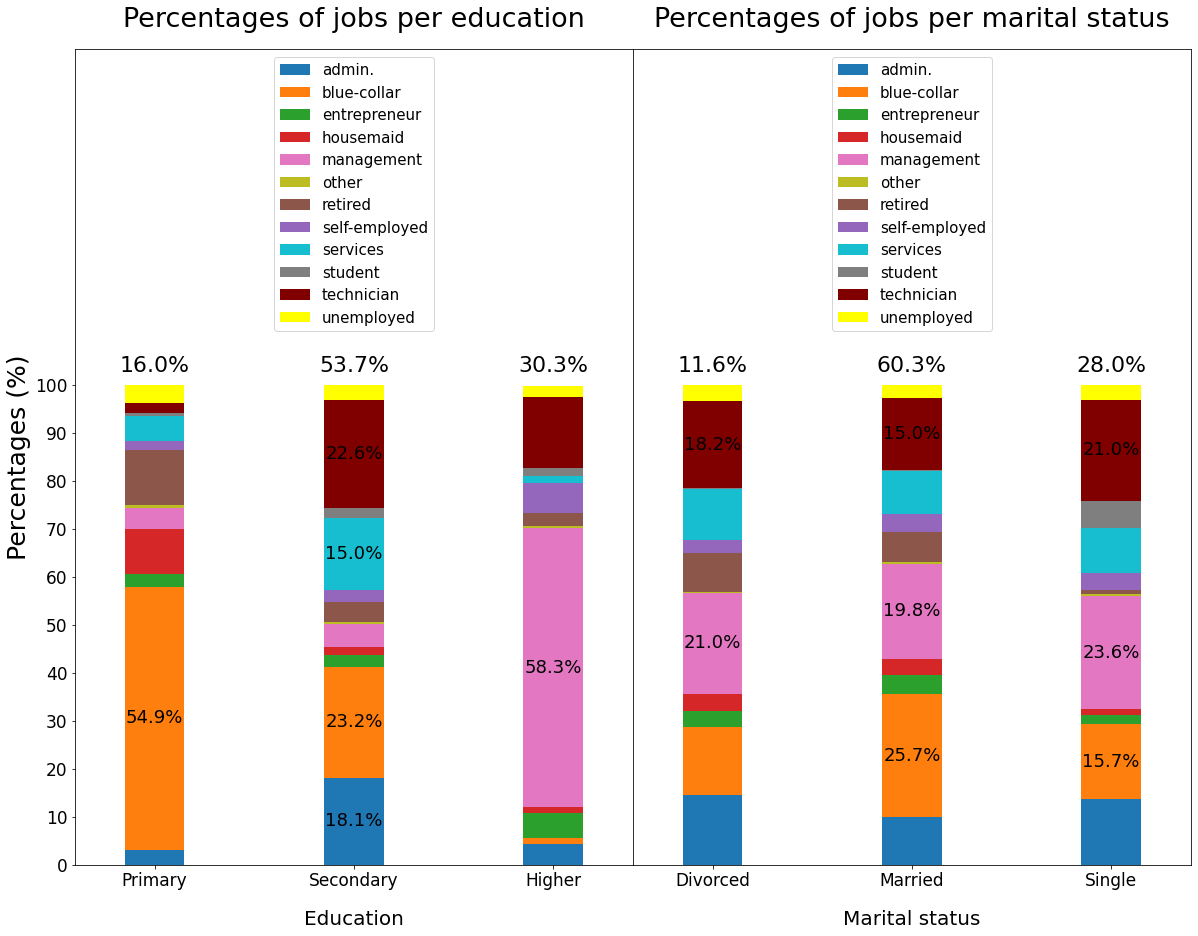

In [7]:
job_and_education = data_1.groupby(['job','education']).size().unstack()
job_and_education = round((job_and_education/job_and_education.sum()).T,3)*100
education = (round(data_1.education.value_counts(normalize=True,ascending=False)*100,1))#.tolist()[::-1]

job_and_marital = data_1.groupby(['job','marital']).size().unstack()
job_and_marital = round((job_and_marital/job_and_marital.sum()).T,3)*100
marital = (round(data_1.marital.value_counts(normalize=True)*100,1)).tolist()[::-1]

#################################################################################################
#################################################################################################
def ticks_on_the_bars(count):
    for p in ax[count].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height>=15:
            ax[count].text(x+width/2, y+height/2, 
                       '{:.1f}%'.format(height), 
                       horizontalalignment='center', 
                       verticalalignment='center',
                       fontsize=18)

def ticks_above_the_bars(l, plot):
    for count, value in enumerate(l):
        ax[plot].text(count, 104, 
                   '{:.1f}%'.format(value), 
                    horizontalalignment='center', 
                    verticalalignment='center',
                    fontsize=22)
#################################################################################################
#################################################################################################
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:pink','tab:olive',
          'tab:brown','tab:purple','tab:cyan','tab:gray','maroon','yellow']
x_ticks = [0,1,2]
y_ticks = np.arange(0,110,10)

fig, ax = plt.subplots(ncols=2, nrows=1,  figsize=(20,14))
plt.subplots_adjust(wspace=0.0)
#################################################################################################

##########---------------------------------  1st plot  --------------------------------##########

job_and_education.plot.bar(ax=ax[0], stacked=True, width=0.3, color=colors, figsize=(20,15))

##########---------------------------------  2nd plot  --------------------------------##########

job_and_marital.plot.bar(ax=ax[1], stacked=True, width=0.3, color=colors, figsize=(20,15))

#################################################################################################

for i in [0,1]:
    if i==0:
        ax[i].set_yticks(y_ticks)
        ax[i].set_yticklabels(y_ticks, fontsize=17)
        ax[i].set_ylabel('Percentages (%)', fontsize=25)
        ax[i].set_xticks(x_ticks)
        ax[i].set_xticklabels(['Primary','Secondary','Higher'], fontsize=17, rotation=0)
        ax[i].set_xlabel('Education', labelpad=20, fontsize=20)
    else:
        ax[i].set_yticks([])
        ax[i].set_ylabel('')
        ax[i].set_xticks(x_ticks)
        ax[i].set_xticklabels(['Divorced','Married','Single'], fontsize=17, rotation=0)
        ax[i].set_xlabel('Marital status', labelpad=20, fontsize=20)
        
    ax[i].legend(loc='upper center', fontsize=15)
    ax[i].set_ylim(0,170) 

ticks_on_the_bars(0)
ticks_on_the_bars(1)
ticks_above_the_bars([16.0, 53.7, 30.3], 0)
ticks_above_the_bars([11.6, 60.3, 28.0], 1)
    
ax[0].set_title('Percentages of jobs per education', y=1.02, fontsize=27)
ax[1].set_title('Percentages of jobs per marital status', y=1.02, fontsize=27);

9.97% have taken personal loan and housing credit.


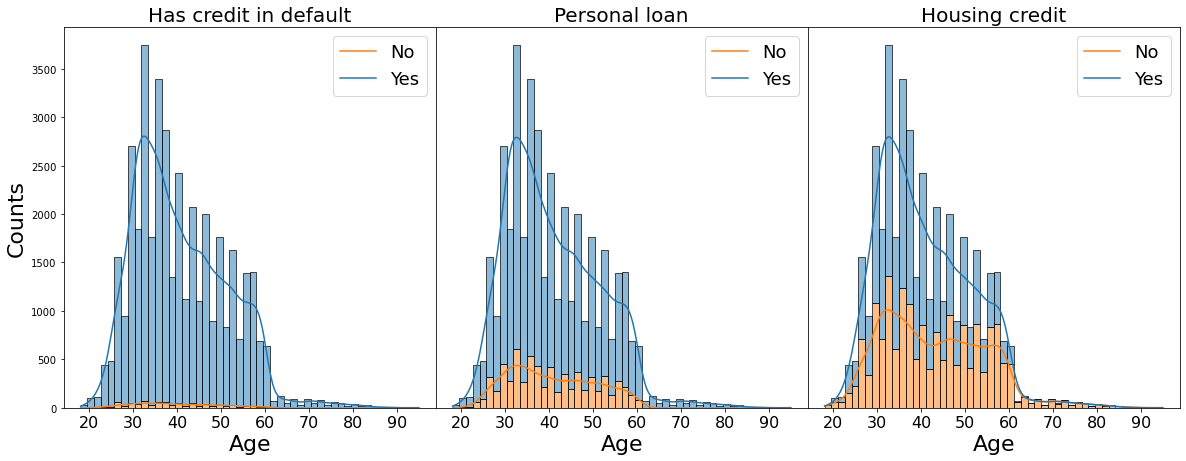

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,7))
ax = ax.flatten()
plt.subplots_adjust(wspace=0)

##########################################################################################################
sns.histplot(data_1, x='age', multiple="stack", hue='default', bins=50, kde=True, ax=ax[0])
ax[0].legend(labels=['No','Yes'], fontsize=18)
x_ticks = np.arange(20,100,10)
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_ticks,fontsize=16)
ax[0].set_xlabel('Age',fontsize=22)
ax[0].set_ylabel('Counts',fontsize=22)

sns.histplot(data_1, x='age', multiple="stack", hue='loan', bins=50, kde=True, ax=ax[1])
sns.histplot(data_1, x='age', multiple="stack", hue='housing', bins=50, kde=True, ax=ax[2])

for x in [1,2]:
    ax[x].set_ylabel('')
    ax[x].set_yticks([])
    ax[x].set_yticklabels([])
    ax[x].legend(labels=['No','Yes'], fontsize=18)
    ax[x].set_xticks(x_ticks)
    ax[x].set_xticklabels(x_ticks,fontsize=16)
    ax[x].set_xlabel('Age',fontsize=22)
    
ax[0].set_title('Has credit in default', fontsize=20)
ax[1].set_title('Personal loan', fontsize=20)
ax[2].set_title('Housing credit', fontsize=20)

x=round((data_1[(data_1.loan=='yes') & (data_1.housing=='yes')].shape[0]/data_1.shape[0])*100,2)
print('%s%% have taken personal loan and housing credit.' %x);

It is obvious that maximum distribution of the age doesn't change, regardless the credict or loan that one has or doesn't have...it looks again around 32 years old.

From whole sample ~10% of the clients have taken a personal loan.

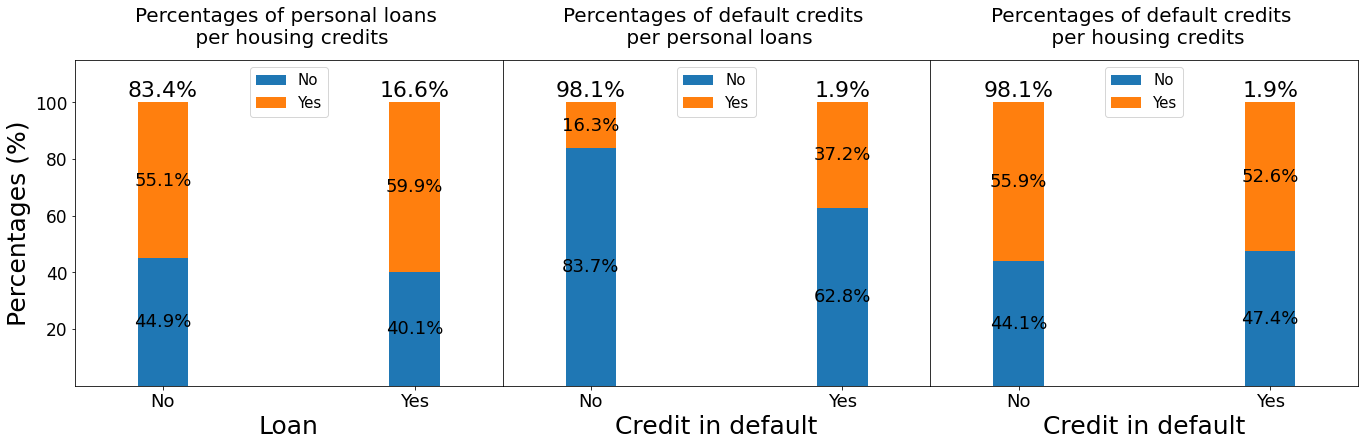

In [9]:
housing_and_loan = data_1.groupby(['housing','loan']).size().unstack()
housing_and_loan = round((housing_and_loan/housing_and_loan.sum()).T,3)*100
loan = (round(data_1.loan.value_counts(normalize=True)*100,1)).tolist()

loan_and_default = data_1.groupby(['loan','default']).size().unstack()
loan_and_default = round((loan_and_default/loan_and_default.sum()).T,3)*100
default = (round(data_1.default.value_counts(normalize=True)*100,1)).tolist()

default_and_housing = data_1.groupby(['housing','default']).size().unstack()
default_and_housing = round((default_and_housing/default_and_housing.sum()).T,3)*100
#################################################################################################
#################################################################################################
def ticks_on_the_bars(count):
    for p in ax[count].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax[count].text(x+width/2, y+height/2, 
                       '{:.1f}%'.format(height), 
                       horizontalalignment='center', 
                       verticalalignment='center',
                       fontsize=18)

def ticks_above_the_bars(l, plot):
    for count, value in enumerate(l):
        ax[plot].text(count, 104, 
                   '{:.1f}%'.format(value), 
                    horizontalalignment='center', 
                    verticalalignment='center',
                    fontsize=22)
#################################################################################################
#################################################################################################
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize=(23,6))
plt.subplots_adjust(wspace=0.0)

#################################################################################################
##########---------------------------------  1st plot  --------------------------------##########

housing_and_loan.plot.bar(ax=ax[0], width=0.2, stacked=True)

##########---------------------------------  2nd plot  --------------------------------##########

loan_and_default.plot.bar(ax=ax[1], width=0.2, stacked=True)

##########---------------------------------  3rd plot  --------------------------------##########

default_and_housing.plot.bar(ax=ax[2], width=0.2, stacked=True)

#################################################################################################
x_labels = ['No','Yes']
x_ticks = [0,1]

y_ticks = np.arange(20,120,20)
which_credit = [loan, default, default]
for i in range(3):
    if i==0:
        ax[i].set_yticks(y_ticks)
        ax[i].set_yticklabels(y_ticks, fontsize=17)
        ax[i].set_ylabel('Percentages (%)', fontsize=25)
    else:
        ax[i].set_yticks([])
        ax[i].set_yticklabels([])
        ax[i].set_ylabel('')
        
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels(x_labels, fontsize=18, rotation=0)
    ax[i].legend(labels=x_labels,loc='upper center', fontsize=15)
    ax[i].set_ylim(0,115) 
    
    ticks_on_the_bars(i)
    ticks_above_the_bars(which_credit[i],i)
    

ax[0].set_xlabel('Loan',fontsize=25)
ax[1].set_xlabel('Credit in default',fontsize=25)
ax[2].set_xlabel('Credit in default',fontsize=25)
    
ax[0].set_title('Percentages of personal loans \n per housing credits', y=1.03, fontsize=20)
ax[1].set_title('Percentages of default credits \n per personal loans', y=1.03, fontsize=20)
ax[2].set_title('Percentages of default credits \n per housing credits', y=1.03, fontsize=20);

To make it comprehensive, if we want to understand how much is the percentage of the clients from the sample who have taken for example a loan and a housing credit, then from the first plot we check the percentages of having both Yes: (59.9/100) * (16.6/100) = 0.0994 (~10%)

This means that ~10% of whole sample has taken a personal loan and a housing credit from the bank. We can verify this number easily.

In [10]:
loan, housing = ['yes','no'], ['yes','no']
for x in loan:
    for y in housing:
        how_many = data_1[(data_1.loan==x) & (data_1.housing==y)].shape[0]
        how_many = round((how_many/data_1.shape[0])*100,2)
        print('Percentage of ' + x + ' for personal loan and ' + y + ' for housing credit: %s%%' %how_many)

Percentage of yes for personal loan and yes for housing credit: 9.97%
Percentage of yes for personal loan and no for housing credit: 6.67%
Percentage of no for personal loan and yes for housing credit: 45.9%
Percentage of no for personal loan and no for housing credit: 37.45%


Let's see who has no housing credit, no personal loan and no other loan from the bank.

In [11]:
how_many=round((data_1[(data_1.default=='no') & (data_1.housing=='no') & (data_1.loan=='no')].shape[0]/data_1.shape[0])*100,1)
print('%s%% has no loan or housing credit or any other kind of loan from the bank.' %how_many)

37.0% has no loan or housing credit or any other kind of loan from the bank.


Previously, we found that 37.45% of the clients haven't taken any personal loan or housing credit. From above, we see that only a very small percentage (0.5%) has taken a default credit but has no personal loan or housing credit.



Let's see three ways to understand how the results continuous column can be explained by a categorical/binary column.

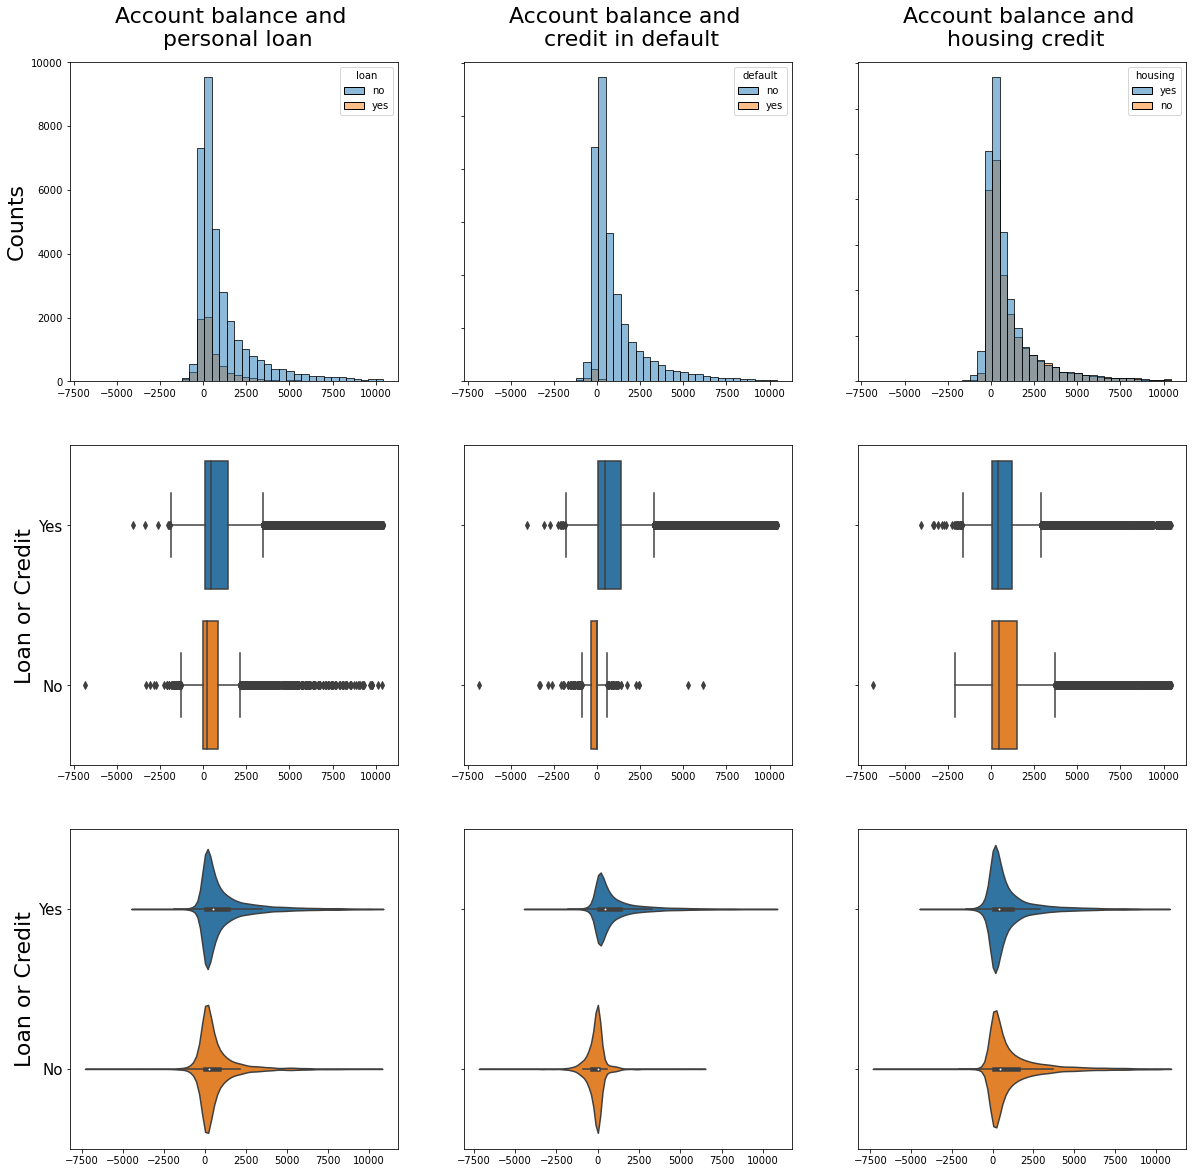

In [12]:
fig, ax = plt.subplots(ncols=3,nrows=3,figsize=(20,20))
ax = ax.flatten()

plotting = ['loan','default','housing']
for count, value in enumerate(plotting):
    sns.histplot(data_1, x='balance', hue=value, bins=40, ax=ax[count])
    sns.boxplot(data=data_1, x='balance', y=value, ax=ax[count+3])
    sns.violinplot(data=data_1, x='balance', y=value, ax=ax[count+6])
    
for i in range(len(ax)):
    if i==0:
        ax[i].set_ylabel('Counts', fontsize=22)
    elif i==3:
        ax[i].set_ylabel('Loan or Credit', fontsize=22)
        ax[i].set_yticks([0,1])
        ax[i].set_yticklabels(['Yes','No'], fontsize=15)
    elif i==6:
        ax[i].set_ylabel('Loan or Credit', fontsize=22)
        ax[i].set_yticks([0,1])
        ax[i].set_yticklabels(['Yes','No'], fontsize=15)
    else:
        ax[i].set_ylabel('')
        ax[i].set_yticklabels('')
        
    ax[i].set_xlabel('')
    
ax[0].set_title('Account balance and \n personal loan', y=1.03, fontsize=22)
ax[1].set_title('Account balance and \n credit in default', y=1.03, fontsize=22)
ax[2].set_title('Account balance and \n housing credit', y=1.03, fontsize=22);

The plot is referred to the balance of the account of the clients. Each of column refers to personal loan, credit in default and housing credit.

Interestingly, one can see that there is a client whose account is not balanced for more than 6000€. Let's see who is this guy.

In [13]:
data_1.loc[data_1.balance<-6000]

,age,job,marital,education,default,balance,housing,loan
14739,49,management,married,tertiary,yes,-6847,no,yes


## What we understand from the EDA that I did above?

+ The majority who is taking a housing credit or a personal loan is between 30s-40s
+ 37.5% of the sample has taken neither personal loan nor a housing credit, while only 10% has taken both
+ The majority of the clients' accounts of the is more or less balanced, nevertheless they have taken a housing credit

### Now I continue with some Feature Engineering

In [14]:
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler

le = LabelEncoder()
ss = MaxAbsScaler()

for col in (categorical_columns_1 + binary_columns_1):
    le.fit(data_1[col])
    data_1[col] = le.transform(data_1[col])
    
X, y = data_1[[x for x in data_1.columns if x!='housing']], data_1.housing
ss.fit(X)
X = ss.transform(X)

Let's give a look at the correlation between the columns and the target column, which is housing.

<ipython-input-15-53a6647fdbb1>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


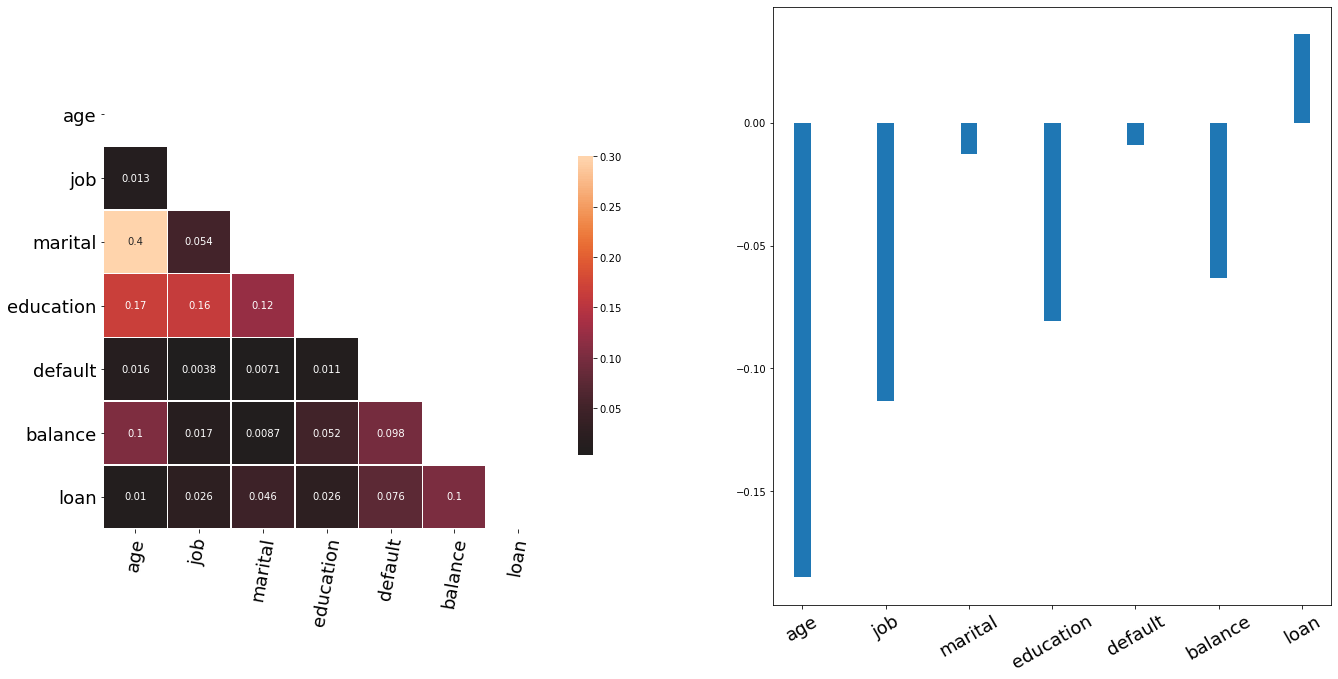

In [15]:
dataframe_X = pd.DataFrame(X, columns=[x for x in data_1.columns if x!='housing'])
correlation = dataframe_X.corr().abs()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(22,11))

sns.heatmap(correlation, ax=ax[0], mask=mask, 
            vmax=.3, center=0, square=True, 
            annot=True, linewidths=.5, cbar_kws={"shrink": .5})

ticks = dataframe_X.columns
ax[0].set_xticklabels(ticks, fontsize=18, rotation=80)
ax[0].set_yticklabels(ticks, fontsize=18, rotation=0)

data_1.loc[:,data_1.columns!='housing'].corrwith(data_1.housing).plot.bar(ax=ax[1], width=0.2)
ax[1].set_xticklabels([x for x in ticks if x!='housing'], fontsize=18, rotation=30);

## Machine Leanring

### Supervised ML: classification
I will use diffferent classification algorithms to predict if they will take housing credit or not. 

Specifically:
 + Logistic regression
 + K-Nearest Neighbours (knn)
 + Decision Trees 
 + Random Forest
 + Gradient Boosting
 
I will check the results using confusion matrix or any other metrics.

### Unsupervised ML: clustering
In the second step I use clustering algorithm to enhance the classification algorithm which gives the best result.

### Unsupervised ML: dimensionality reduction
I will also use PCA, even though the number of columns is low.

I will start by splitting the data into train and test, where I use GridSearchCV to find the best estimator given the parameters.
I will also split the sample into different subsamples using the stratified k-fold, in order to count the standard deviation.

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold

k_folds = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

#### Logistic Regression

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {'penalty': ['l1','l2','elasticnet','none'],
              'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
              'C':[i for i in range(1,10)]}

GD_LR = GridSearchCV(LogisticRegression(random_state=42),
                     param_grid=parameters, 
                     scoring='accuracy',
                     n_jobs=-1)

#### k-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[5,10,15,20,30,40],
              'weights': ['uniform','distance'],
              'p': [2,4,6,8]}

GD_KNN = GridSearchCV(KNeighborsClassifier(metric='minkowski'),
                     param_grid=parameters, 
                     scoring='accuracy',
                     n_jobs=-1)

#### Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier

#I need to tune specific values for the parameters so I will do a fit firstly
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt = dt.fit(X_train,y_train)
parameters = {'max_depth': range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}
    
GD_dt = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42),
                     param_grid=parameters, 
                     scoring='accuracy',
                     n_jobs=-1)

#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [15, 20, 30, 40, 50, 100]}

GD_rf = GridSearchCV(RandomForestClassifier(oob_score=True, random_state=42, criterion='entropy', warm_start=True),
                     param_grid=parameters, 
                     scoring='accuracy',
                     n_jobs=-1)

#### Extra Trees

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

parameters = {'n_estimators': [15, 20, 30, 40, 50, 100]}

GD_et= GridSearchCV(ExtraTreesClassifier(criterion='entropy', random_state=42),
                     param_grid=parameters, 
                     scoring='accuracy',
                     n_jobs=-1)

#### Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [15, 20, 30, 40, 50, 100],
              'min_samples_split': [2,4,6],
              'min_samples_leaf': [1,2,3]}

GD_gb = GridSearchCV(GradientBoostingClassifier(random_state=42, warm_start=True),
                     param_grid=parameters, 
                     scoring='accuracy',
                     n_jobs=-1)

In [24]:
models = [('Logistic Regression', GD_LR),
          ('KNN', GD_KNN),
          ('Decision Trees', GD_dt),
          ('Random Forest', GD_rf),
          ('Extra Trees', GD_et)]

In [25]:
from sklearn.model_selection import cross_val_score

results_col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC']
results = pd.DataFrame(columns=results_col)

l = 0

accuracy_models_opt, precision_models_opt, recall_models_opt, roc_auc_models_opt = [], [], [], []

for name, model in models:
    print(name)
    model.fit(X_train,y_train)
    
    accuracy = cross_val_score(model.best_estimator_, X, y, cv=k_folds, scoring='accuracy')
    accuracy_models_opt.append(accuracy)    
    precision = cross_val_score(model.best_estimator_, X, y, cv=k_folds, scoring='precision')
    precision_models_opt.append(precision)
    recall = cross_val_score(model.best_estimator_, X, y, cv=k_folds, scoring='recall')
    recall_models_opt.append(recall)
    roc_auc = cross_val_score(model.best_estimator_, X, y, cv=k_folds, scoring='roc_auc')
    roc_auc_models_opt.append(roc_auc)
    
    results.loc[l] = [name,
                      '%s $\pm$ %s' %(round(accuracy.mean()*100,2),round(accuracy.std()*100,2)),
                      '%s $\pm$ %s' %(round(precision.mean()*100,2),round(precision.std()*100,2)),
                      '%s $\pm$ %s' %(round(recall.mean()*100,2),round(recall.std()*100,2)),
                      '%s $\pm$ %s' %(round(roc_auc.mean()*100,2),round(roc_auc.std()*100,2))]
    l += 1

Logistic Regression
KNN
Decision Trees
Random Forest
Extra Trees


Let's give a look on the results.

In [26]:
results

,Classifier,Accuracy,Precision,Recall,ROC-AUC
0,Logistic Regression,60.88 $\pm$ 0.67,62.08 $\pm$ 0.52,77.09 $\pm$ 0.83,64.3 $\pm$ 0.67
1,KNN,65.84 $\pm$ 0.56,68.21 $\pm$ 0.47,72.8 $\pm$ 0.74,71.6 $\pm$ 0.51
2,Decision Trees,63.52 $\pm$ 1.12,65.84 $\pm$ 1.06,72.27 $\pm$ 3.76,68.17 $\pm$ 1.13
3,Random Forest,64.67 $\pm$ 0.48,67.88 $\pm$ 0.44,69.81 $\pm$ 0.68,69.68 $\pm$ 0.57
4,Extra Trees,63.31 $\pm$ 0.56,67.28 $\pm$ 0.58,66.83 $\pm$ 0.63,69.24 $\pm$ 0.58


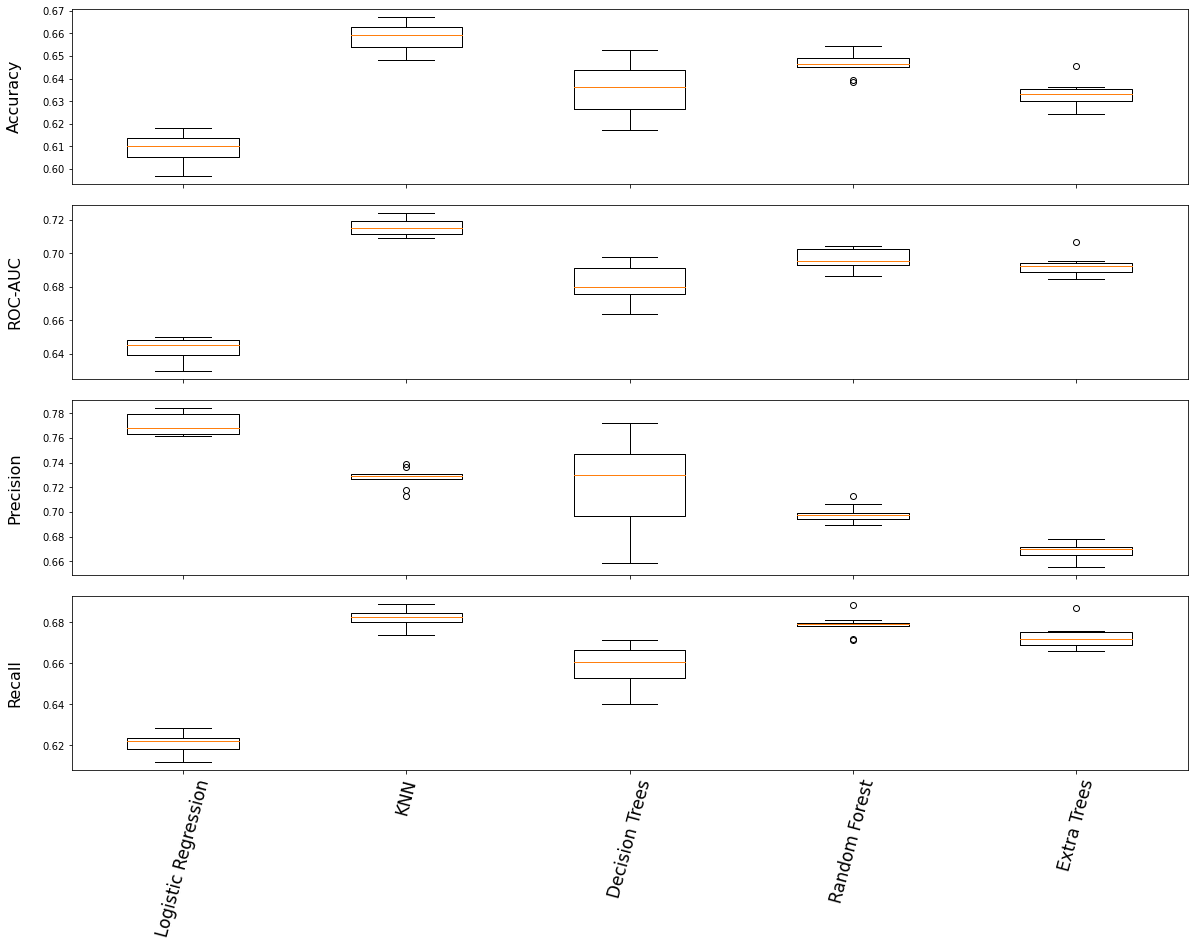

In [27]:
models_name = [name for name,model in models]

fig, ax = plt.subplots(4, 1, figsize=(20,14))
plt.subplots_adjust(hspace=0.12)

ax[0].boxplot(accuracy_models_opt)
ax[1].boxplot(roc_auc_models_opt)
ax[2].boxplot(recall_models_opt)
ax[3].boxplot(precision_models_opt)

ax[0].set_ylabel('Accuracy', labelpad=20, fontsize=16)
ax[1].set_ylabel('ROC-AUC', labelpad=20, fontsize=16)
ax[2].set_ylabel('Precision', labelpad=20, fontsize=16)
ax[3].set_ylabel('Recall', labelpad=20, fontsize=16)

xticks = np.arange(1,6)
for i in range(len(ax)):
    if i==3:
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(models_name, fontsize=17, rotation=75)
    else:
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels('');

Obviously the results are not satisfying, although the ***k-nearest neighbor*** gives the best.

Let's see which is the best estimator of knn:

In [28]:
GD_KNN.best_estimator_

KNeighborsClassifier(n_neighbors=40, p=4, weights='distance')

For the specific p and weights, I will change the number of neighbors in order to increase the accuracy.

In [29]:
from sklearn.metrics import accuracy_score, f1_score

neigh = [i for i in range(40,112,2)]

accuracy_results, f1_results, error = list(), list(), list()
for n in neigh:
    estimator = KNeighborsClassifier(n_neighbors=n, p=4, weights='distance', metric='minkowski')
    estimator = estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    accuracy_results.append(accuracy_score(y_pred,y_test))
    f1_results.append(f1_score(y_pred,y_test))
    error.append(1-round(accuracy_score(y_pred,y_test),4))

I will plot the **F1-score** and the **error rate** and I will also use Ridge regression to see the line.

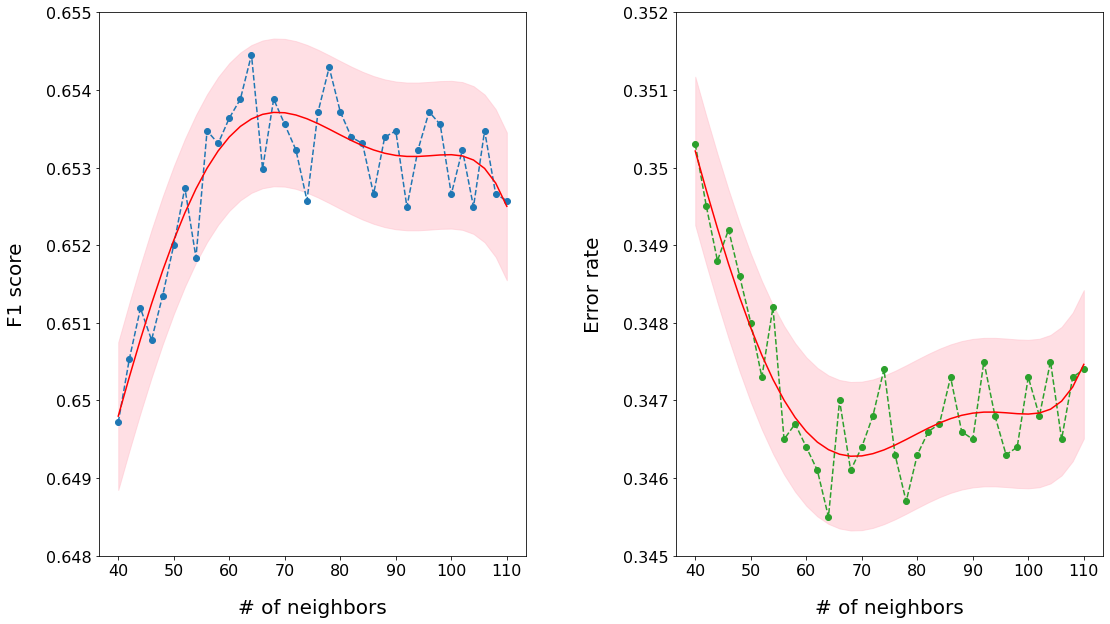

In [30]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

def using_ridge(a,b):
    for_X, for_y = np.array(a).reshape(-1,1), np.array(b)

    pf = PolynomialFeatures(degree=6)
    for_X = pf.fit_transform(for_X)
    ridge = Ridge(alpha=0.1, max_iter=100000)
    ridge.fit(for_X, for_y)
    y_pred = ridge.predict(for_X)
    return y_pred
##########################################################################################
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18,10))
plt.subplots_adjust(wspace=0.35)
ax1, ax2 = ax[0], ax[1]
##########################################################################################
#-------------------------------------  F1 score  ---------------------------------------#
##########################################################################################
ax1.plot(neigh, accuracy_results, '--o', color='tab:blue')
y_predicted = using_ridge(neigh, accuracy_results)
ax1.plot(neigh, y_predicted, color="red")
ax1.fill_between(neigh, y_predicted-y_predicted.std(), y_predicted+y_predicted.std(), color="pink", alpha=0.5)

y_ticks = np.round(np.linspace(0.648,0.655,8),3)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks, fontsize=16)
x_ticks = np.arange(40,120,10)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, fontsize=16)

ax1.set_ylabel('F1 score', labelpad=20, fontsize=20)
ax1.set_xlabel('# of neighbors', labelpad=20, fontsize=20)
##########################################################################################
#--------------------------------------  Error  -----------------------------------------#
##########################################################################################
ax2.plot(neigh, error, '--o', color='tab:green')
y_predicted = using_ridge(neigh, error)
ax2.plot(neigh, y_predicted, color="red")
ax2.fill_between(neigh, y_predicted-y_predicted.std(), y_predicted+y_predicted.std(), color="pink", alpha=0.5)

y_ticks = np.round(np.linspace(0.345,0.352,8),3)
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(y_ticks, fontsize=16)
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_ticks, fontsize=16)

ax2.set_ylabel('Error rate', labelpad=20, fontsize=20)
ax2.set_xlabel('# of neighbors', labelpad=20, fontsize=20);

Let's find the "optimal" number of the neighbors

In [31]:
n_opt = neigh[accuracy_results.index(max(accuracy_results))]
print('I will continue with %s neighbors to PCA and clustering.' %n_opt)

I will continue with 64 neighbors to PCA and clustering.


From now on until the end of this subproject I will use as classifier the k-nearest neighbor and I put the specific optimized parameters that I found above:

In [32]:
classifier = KNeighborsClassifier(n_neighbors=64, p=4, weights='distance', metric='minkowski')

Let's give a look on the classification report and the confusion matrix:

In [33]:
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

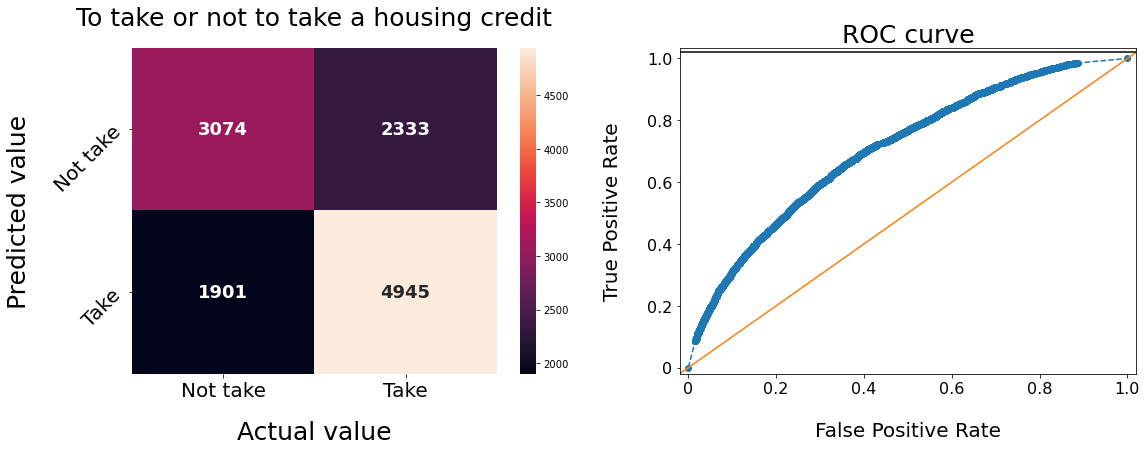

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve

fig, ax = plt.subplots(1, 2, figsize=(18,6))
axList = ax.flatten()
ax0, ax1 = ax[0], ax[1]

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                         Confusion Matrix                                            #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 18, "weight": "bold"}, fmt='g', ax=ax0)
ticks=['Not take', 'Take']
ax0.set_xticklabels(ticks, fontsize=20)
ax0.set_yticklabels(ticks, fontsize=20, rotation=45)
ax0.set_ylabel('Predicted value', labelpad=20, fontsize=25)
ax0.set_xlabel('Actual value', labelpad=20, fontsize=25)
ax0.set_title('To take or not to take a housing credit', fontsize=25, y=1.05)

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                           ROC curve                                                 #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################

probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, probs)

ax1.plot(rf_fpr, rf_tpr, '--o')
ax1.plot([-0.02,1.02],[-0.02,1.02], '-')
ax1.plot([-0.02,1.02],[1.02,1.02], '-', color='black')

ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks, fontsize=16)

ax1.set_yticks(ticks)
ax1.set_yticklabels(ticks, fontsize=16)

ax1.set_xlim(-0.02,1.02)
ax1.set_ylim(-0.02,1.035)

ax1.set_xlabel('False Positive Rate', fontsize=20, labelpad=25)
ax1.set_ylabel('True Positive Rate', fontsize=20, labelpad=25)
ax1.set_title('ROC curve', fontsize=25);

It is oobvious that the non-diagonal elements are quit high and these elements reduces the accuracy...

Let's give a look at the classification report:

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      5407
           1       0.68      0.72      0.70      6846

    accuracy                           0.65     12253
   macro avg       0.65      0.65      0.65     12253
weighted avg       0.65      0.65      0.65     12253



#### PCA

In [36]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 8):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data_1)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': (data_1).columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.999958
2,PCA(n_components=2),0.999995
3,PCA(n_components=3),1.0
4,PCA(n_components=4),1.0
5,PCA(n_components=5),1.0
6,PCA(n_components=6),1.0
7,PCA(n_components=7),1.0


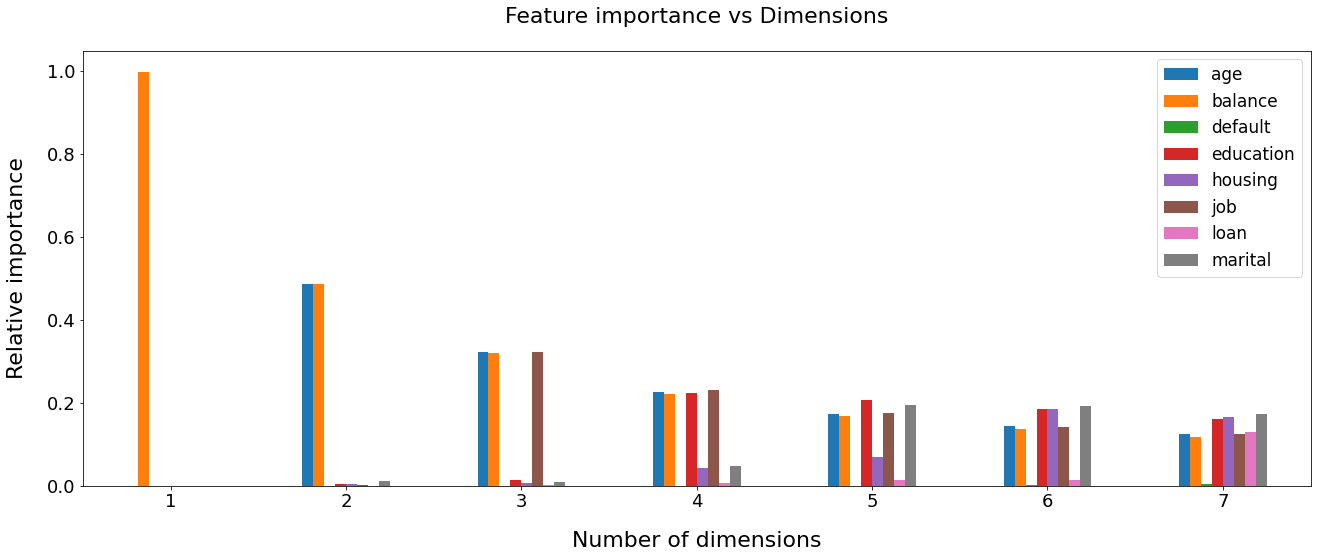

In [37]:
features_df = (pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values'))

ax = features_df.plot(kind='bar', figsize=(22,8))
ax.legend(loc='upper right', fontsize=17)

x_ticks = np.arange(1,8)
ax.set_xticks(x_ticks-1)
ax.set_xticklabels(x_ticks, fontsize=18, rotation=0)

y_ticks = np.round(np.linspace(0.0, 1.0, 6),1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=18)

ax.set_xlabel('Number of dimensions', labelpad=20, fontsize=22)
ax.set_ylabel('Relative importance',labelpad=20, fontsize=22)
ax.set_title('Feature importance vs Dimensions', y=1.05, fontsize=22);

Let's give a look at the result if we use only four columns to predict if the costumer is going to take a housing credit or not. These columns are age, balance, education and job.

In [38]:
data_1_check = data_1.copy()
data_1_check.drop(columns=[x for x in data_1_check.columns if x not in ['age','balance','education','job','housing']])

,age,job,education,balance,housing
0,58,4,2,2143,1
1,44,10,1,29,1
2,33,2,1,2,1
3,35,4,2,231,1
4,28,4,2,447,1
...,...,...,...,...,...
40836,25,10,1,505,0
40837,51,10,2,825,0
40838,71,6,0,1729,0
40839,72,6,1,5715,0


In [39]:
X, y = data_1_check[[x for x in data_1_check.columns if x!='housing']], data_1_check.housing
ss.fit(X)
X = ss.transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

I apply the classifier:

In [41]:
classifier = classifier.fit(X_train, y_train)
y_pred_check = classifier.predict(X_test)

I will plot the results before applying the PCA and after applying the PCA:

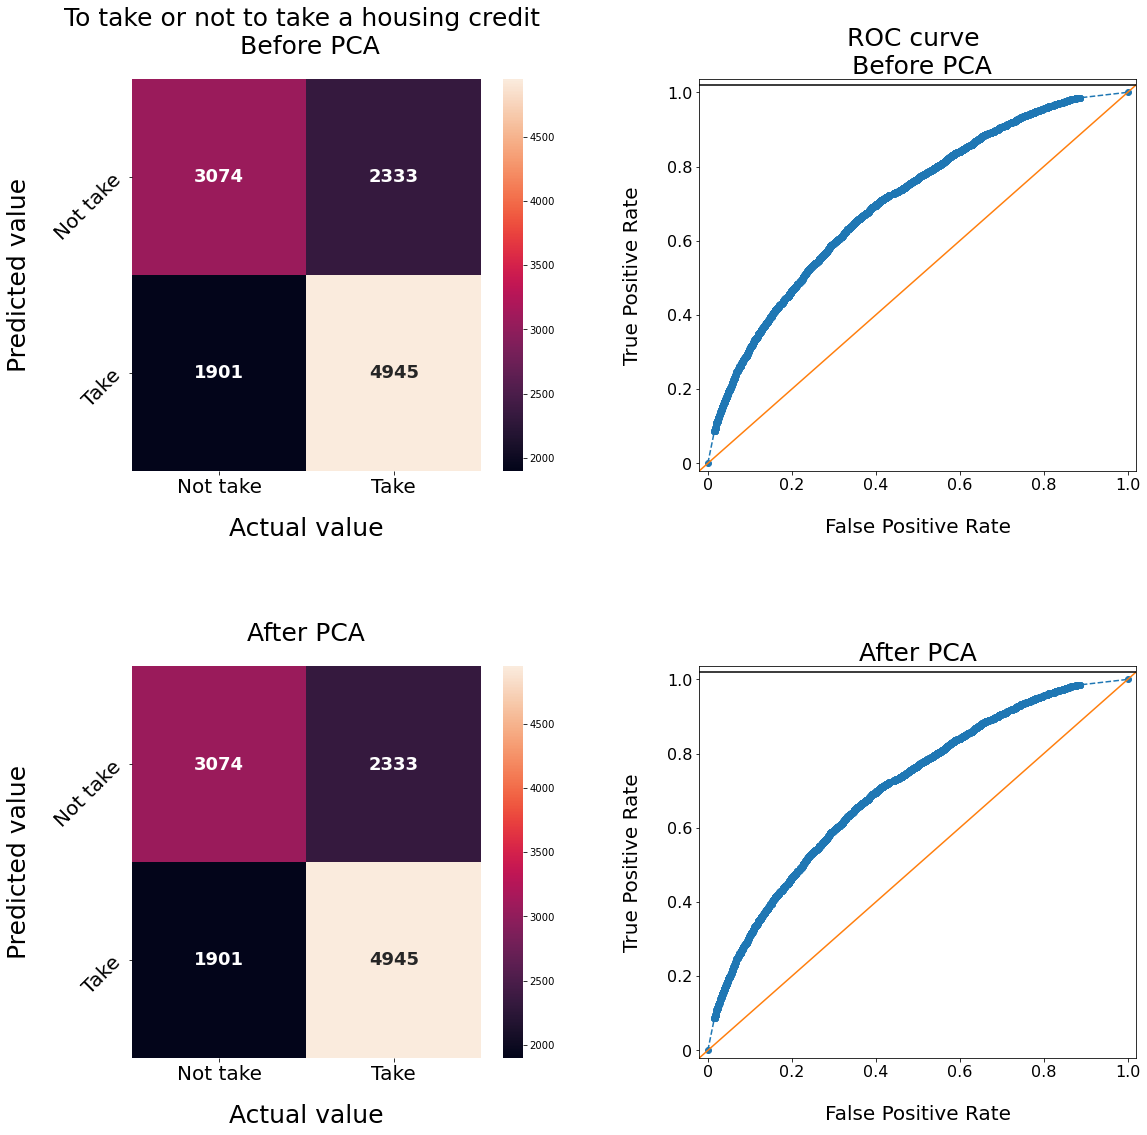

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(18,18))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
axList = ax.flatten()
ax0, ax1, ax2, ax3 = axList[0], axList[1], axList[2], axList[3]

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                         Confusion Matrix                                            #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################

#Before PCA
sns.heatmap(cm, annot=True, annot_kws={"size": 18, "weight": "bold"}, fmt='g', ax=ax0)
ticks=['Not take', 'Take']
ax0.set_xticklabels(ticks, fontsize=20)
ax0.set_yticklabels(ticks, fontsize=20, rotation=45)
ax0.set_ylabel('Predicted value', labelpad=20, fontsize=25)
ax0.set_xlabel('Actual value', labelpad=20, fontsize=25)
ax0.set_title('To take or not to take a housing credit \n Before PCA', fontsize=25, y=1.05)

#After PCA
cm_new = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_new, annot=True, annot_kws={"size": 18, "weight": "bold"}, fmt='g', ax=ax2)
ticks=['Not take', 'Take']
ax2.set_xticklabels(ticks, fontsize=20)
ax2.set_yticklabels(ticks, fontsize=20, rotation=45)
ax2.set_ylabel('Predicted value', labelpad=20, fontsize=25)
ax2.set_xlabel('Actual value', labelpad=20, fontsize=25)
ax2.set_title('After PCA', fontsize=25, y=1.05)

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                           ROC curve                                                 #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################

#Before PCA
ax1.plot(rf_fpr, rf_tpr, '--o')
ax1.plot([-0.02,1.02],[-0.02,1.02], '-')
ax1.plot([-0.02,1.02],[1.02,1.02], '-', color='black')

ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks, fontsize=16)
ax1.set_yticks(ticks)
ax1.set_yticklabels(ticks, fontsize=16)

ax1.set_xlim(-0.02,1.02)
ax1.set_ylim(-0.02,1.035)

ax1.set_xlabel('False Positive Rate', fontsize=20, labelpad=25)
ax1.set_ylabel('True Positive Rate', fontsize=20, labelpad=25)
ax1.set_title('ROC curve \n Before PCA', fontsize=25);

#After PCA
probs_after_pca = classifier.predict_proba(X_test) 
probs_after_pca = probs_after_pca[:, 1] 
rf_fpr_after_pca, rf_tpr_after_pca, rf_thresholds_after_pca = roc_curve(y_test, probs_after_pca)

ax3.plot(rf_fpr_after_pca, rf_tpr_after_pca, '--o')
ax3.plot([-0.02,1.02],[-0.02,1.02], '-')
ax3.plot([-0.02,1.02],[1.02,1.02], '-', color='black')

ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks, fontsize=16)
ax3.set_yticks(ticks)
ax3.set_yticklabels(ticks, fontsize=16)

ax3.set_xlim(-0.02,1.02)
ax3.set_ylim(-0.02,1.035)

ax3.set_xlabel('False Positive Rate', fontsize=20, labelpad=25)
ax3.set_ylabel('True Positive Rate', fontsize=20, labelpad=25)
ax3.set_title('After PCA', fontsize=25);

The results remain the same...

## Clustering

Let's keep the last moodified data (data_1_check) and check which are the results by using 2 clusters for KMeans,  and Hierarchical Agglomerative Clustering.

#### KMeans

In [43]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data_1_check.loc[:,data_1_check.columns!='housing'])

data_1_check['kmeans'] = km.predict(data_1_check.loc[:,data_1_check.columns!='housing'])

#### Hierarchical Agglomerative Clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='single')
ag = ag.fit(data_1_check.loc[:,data_1_check.columns!='housing'])

data_1_check['HAG-single'] = ag.fit(data_1_check.loc[:,data_1_check.columns!='housing'])

Let's give a look on the results:

In [45]:
data_1_check[['housing','kmeans']].groupby(['kmeans','housing']).size().to_frame().rename(columns={0:'number'})

number
kmeans housing        
0      0          2563
       1          2500
1      0         15458
       1         20320

In [46]:
data_1_check[['housing','HAG-single']].groupby(['HAG-single','housing']).size().to_frame().rename(columns={0:'number'})

number
HAG-single                                housing        
AgglomerativeClustering(linkage='single') 0         18021
                                          1         22820

Both are misclustering the result!!!

## Subproject 1 - Conclusions:

Into this subproject, the target column was the column housing. Interestingly, from the EDA, I found out that:
+ The majority who is taking a housing credit or a personal loan is between 30s-40s
+ 37.5% of the sample has taken neither personal loan nor a housing credit, while only 10% has taken both
+ The majority of the clients' accounts of the is more or less balanced, nevertheless they have taken a housing credit


I started by applying classification algorithms and finding the best option, which was k-NN. Then, I optimized the number of neighbors, used PCA to reduce the dimensionality, and at the reduced dimesionality-dataset I used claustering methods to cluster the target based on the unlabeled data. Both clustering methods failed, I would say.

## Subproject 2: Predicting if a client is going to respond

Now I will use all of the columns of the dataset.

The EDA will focus on the column response.

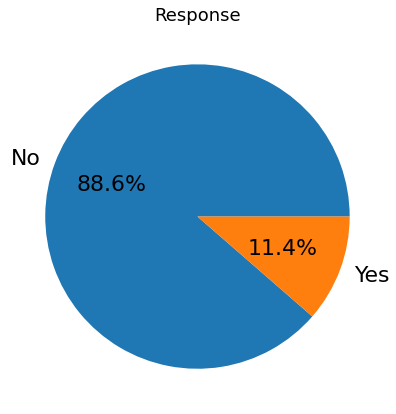

In [47]:
ax = round(data.response.value_counts(normalize=True)*100,1).plot.pie(autopct='%.1f%%', fontsize=22, 
                                                                      labels=['No', 'Yes'], figsize=(12,7))
ax.set_ylabel('')
ax.set_title('Response', fontsize=18);

Obviously, people are not responding. Only **11%** has responded.

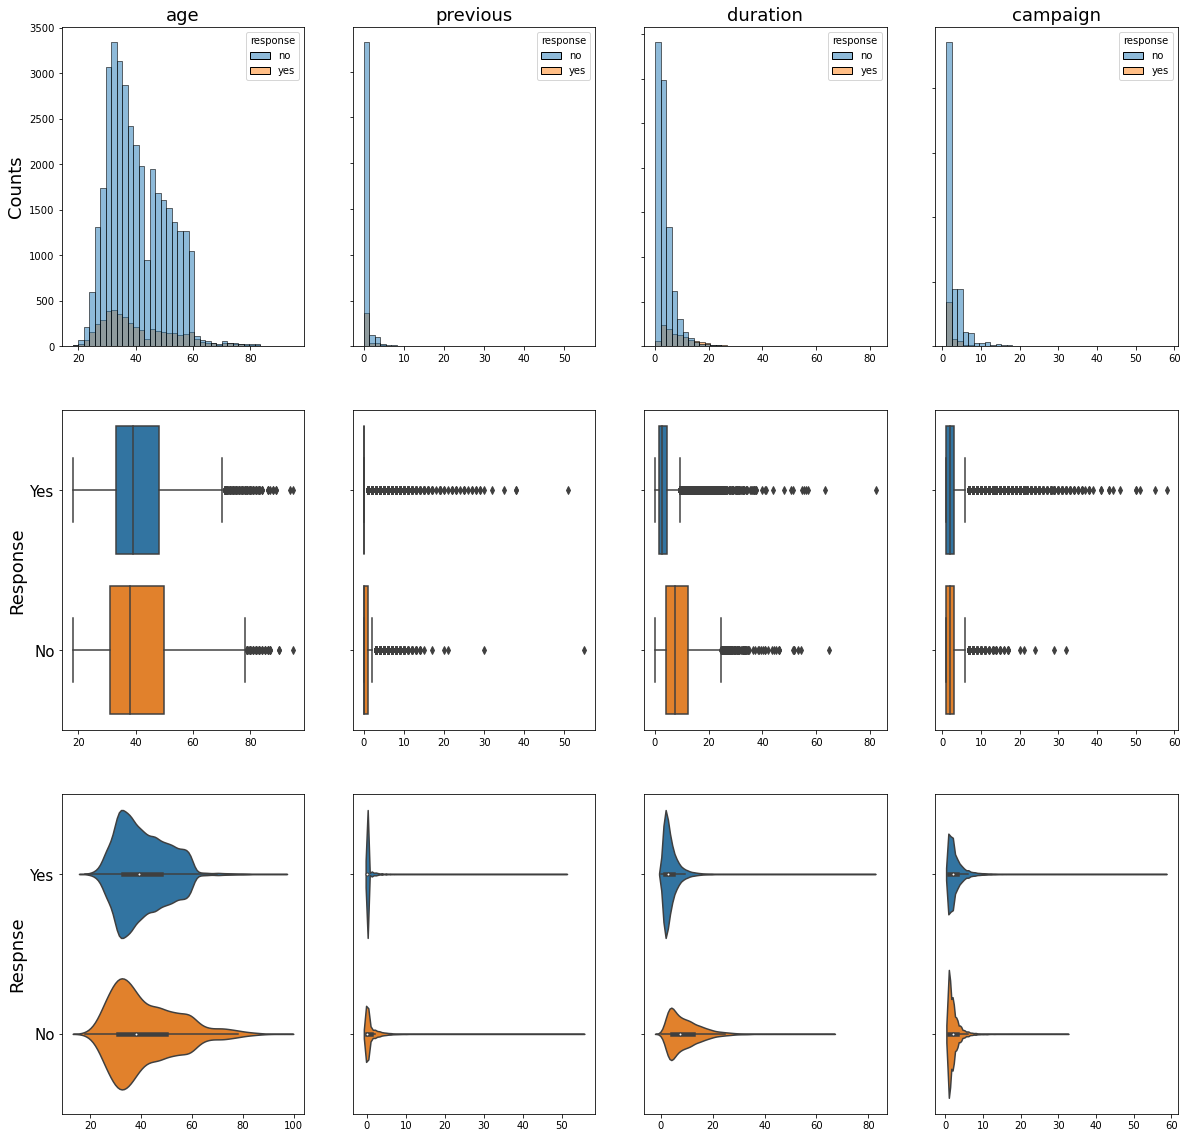

In [48]:
fig, ax = plt.subplots(ncols=4,nrows=3,figsize=(20,20))
ax = ax.flatten()

plotting = ['age','previous','duration','campaign']
for count, value in enumerate(plotting):
    sns.histplot(data, x=value, hue='response', bins=40, ax=ax[count])
    sns.boxplot(data=data, x=value, y='response', ax=ax[count+4])
    sns.violinplot(data=data, x=value, y='response', ax=ax[count+8])
    ax[count].set_title(value, fontsize=18)
    
for i in range(len(ax)):
    if i==0:
        ax[i].set_ylabel('Counts', fontsize=18)
    elif i==4:
        ax[i].set_ylabel('Response', fontsize=18)
        ax[i].set_yticks([0,1])
        ax[i].set_yticklabels(['Yes','No'], fontsize=15)
    elif i==8:
        ax[i].set_ylabel('Respnse', fontsize=18)
        ax[i].set_yticks([0,1])
        ax[i].set_yticklabels(['Yes','No'], fontsize=15)
    else:
        ax[i].set_ylabel('')
        ax[i].set_yticklabels('')
        
    ax[i].set_xlabel('');

One can see that people aren't responding....

### Feature Engineering

In [49]:
numerical_columns, categorical_columns, binary_columns = list(), list(), list()
for x in data.columns:
    if data[x].dtype in ['float','int']:
        numerical_columns.append(x)
    else:
        if len(data[x].value_counts())>2:
            categorical_columns.append(x)
        else:
            binary_columns.append(x)
            
le = LabelEncoder()
ss = MaxAbsScaler()
for col in (data.columns):
    if col in (categorical_columns+binary_columns):
        le.fit(data[col])
        data[col] = le.transform(data[col])
    
X, y = data[[x for x in data.columns if x!='response']], data.response
ss.fit(X)
X = ss.transform(X)

dataframe_X = pd.DataFrame(X, columns=[x for x in data.columns if x!='response'])
dataframe_X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,0.610526,0.363636,0.5,1.0,0.0,0.205209,1.0,0.0,0.161290,0.727273,0.053068,0.017241,-0.001148,0.000000,1.0
1,0.463158,0.909091,1.0,0.5,0.0,0.002777,1.0,0.0,0.161290,0.727273,0.030743,0.017241,-0.001148,0.000000,1.0
2,0.347368,0.181818,0.5,0.5,0.0,0.000192,1.0,1.0,0.161290,0.727273,0.015493,0.017241,-0.001148,0.000000,1.0
3,0.368421,0.363636,0.5,1.0,0.0,0.022120,1.0,0.0,0.161290,0.727273,0.028303,0.017241,-0.001148,0.000000,1.0
4,0.294737,0.363636,1.0,1.0,0.0,0.042804,1.0,1.0,0.161290,0.727273,0.044162,0.017241,-0.001148,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,0.263158,0.909091,1.0,0.5,0.0,0.048358,0.0,1.0,0.548387,0.818182,0.078443,0.034483,-0.001148,0.000000,1.0
40837,0.536842,0.909091,0.5,1.0,0.0,0.079000,0.0,0.0,0.548387,0.818182,0.198609,0.051724,-0.001148,0.000000,1.0
40838,0.747368,0.545455,0.0,0.0,0.0,0.165565,0.0,0.0,0.548387,0.818182,0.092717,0.034483,-0.001148,0.000000,1.0
40839,0.757895,0.545455,0.5,0.5,0.0,0.547257,0.0,0.0,0.548387,0.818182,0.229108,0.086207,0.211251,0.054545,0.5


In [50]:
dataframe_X.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,0.429376,0.426675,0.581854,0.571644,0.018682,0.102842,0.558752,0.166475,0.511731,0.500139,0.052567,0.047830,0.037024,0.007942,0.869163
std,0.110268,0.333735,0.304084,0.332583,0.135402,0.163991,0.496542,0.372511,0.268181,0.271778,0.052529,0.053520,0.104177,0.028588,0.324355
min,0.189474,0.000000,0.000000,0.000000,0.000000,-0.655655,0.000000,0.000000,0.032258,0.000000,0.001220,0.017241,-0.001148,0.000000,0.000000
25%,0.347368,0.090909,0.500000,0.500000,0.000000,0.006129,0.000000,0.000000,0.258065,0.272727,0.021105,0.017241,-0.001148,0.000000,1.000000
50%,0.410526,0.363636,0.500000,0.500000,0.000000,0.040314,1.000000,0.000000,0.516129,0.545455,0.036599,0.034483,-0.001148,0.000000,1.000000
75%,0.505263,0.727273,1.000000,1.000000,0.000000,0.127645,1.000000,0.000000,0.677419,0.727273,0.064658,0.051724,-0.001148,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's give a look at the correlations between columns and to the target column:

<ipython-input-51-54c7c7c55703>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


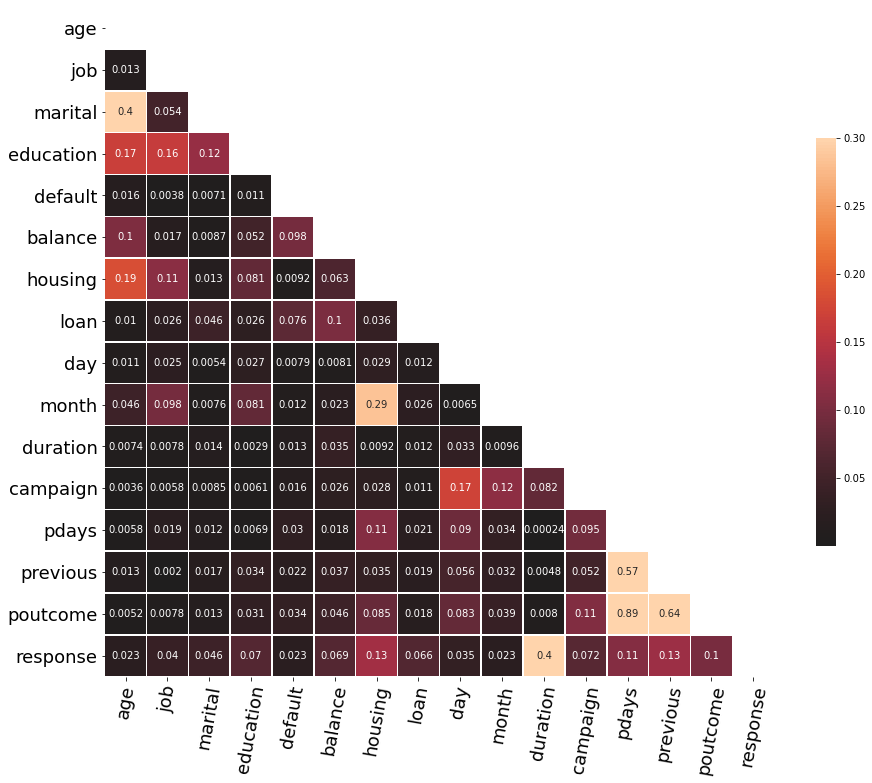

In [51]:
correlation = data.corr().abs()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.heatmap(correlation, mask=mask, ax=ax,
            vmax=.3, center=0, square=True, 
            annot=True, linewidths=.5, cbar_kws={"shrink": .5})

ticks = data.columns
ax.set_xticklabels(ticks, fontsize=18, rotation=80)
ax.set_yticklabels(ticks, fontsize=18, rotation=0);

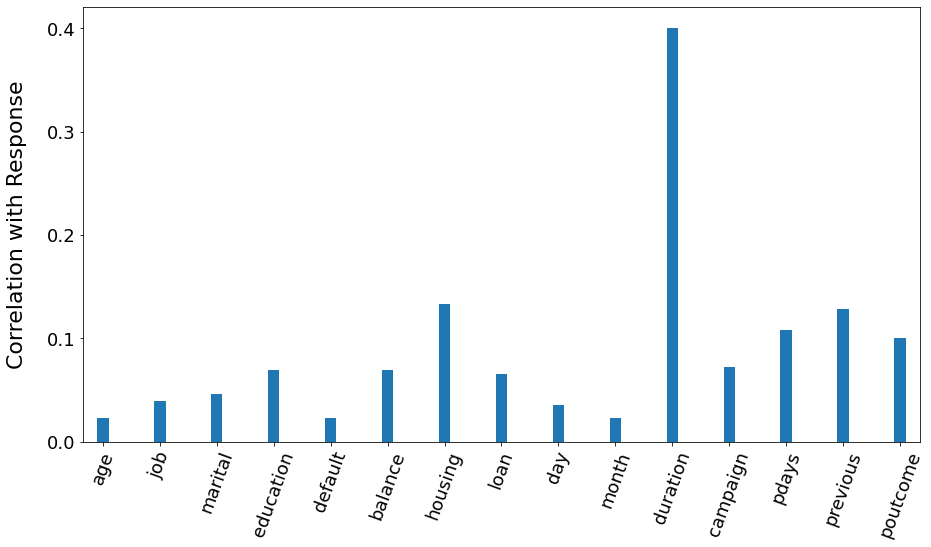

In [52]:
fig, ax = plt.subplots(1,1,figsize=(15,8))

data.loc[:,data.columns!='response'].corrwith(data.response).abs().plot.bar(ax=ax, width=0.2)
ax.set_xticklabels([x for x in ticks if x!='response'], fontsize=18, rotation=70)

y_ticks=np.round(np.linspace(0.0,0.4,5),1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=18, rotation=0)
ax.set_ylabel('Correlation with Response', labelpad=20, fontsize=22);

Now I split the data into train and test and I will use the classifier of the previous subproject, k-NN, with the specific optimized parameters.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = KNeighborsClassifier(n_neighbors=64, p=4, weights='distance', metric='minkowski')
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Let's give a look at the confusion matrix and ROC-curve

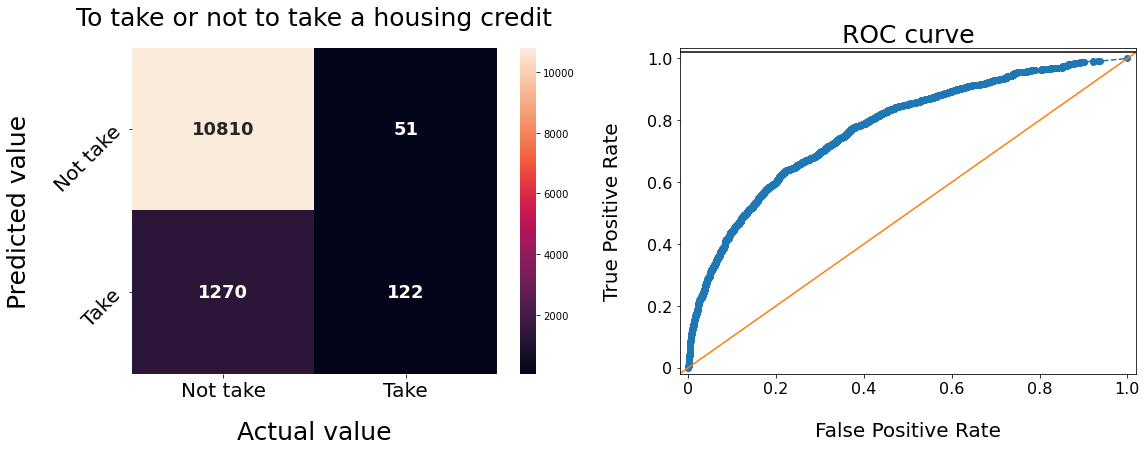

In [54]:
from sklearn.metrics import confusion_matrix, roc_curve

fig, ax = plt.subplots(1, 2, figsize=(18,6))
axList = ax.flatten()
ax0, ax1 = ax[0], ax[1]

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                         Confusion Matrix                                            #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 18, "weight": "bold"}, fmt='g', ax=ax0)
ticks=['Not take', 'Take']
ax0.set_xticklabels(ticks, fontsize=20)
ax0.set_yticklabels(ticks, fontsize=20, rotation=45)
ax0.set_ylabel('Predicted value', labelpad=20, fontsize=25)
ax0.set_xlabel('Actual value', labelpad=20, fontsize=25)
ax0.set_title('To take or not to take a housing credit', fontsize=25, y=1.05)

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                           ROC curve                                                 #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################

probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, probs)

ax1.plot(rf_fpr, rf_tpr, '--o')
ax1.plot([-0.02,1.02],[-0.02,1.02], '-')
ax1.plot([-0.02,1.02],[1.02,1.02], '-', color='black')

ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks, fontsize=16)

ax1.set_yticks(ticks)
ax1.set_yticklabels(ticks, fontsize=16)

ax1.set_xlim(-0.02,1.02)
ax1.set_ylim(-0.02,1.035)

ax1.set_xlabel('False Positive Rate', fontsize=20, labelpad=25)
ax1.set_ylabel('True Positive Rate', fontsize=20, labelpad=25)
ax1.set_title('ROC curve', fontsize=25);

Classification report:

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10861
           1       0.71      0.09      0.16      1392

    accuracy                           0.89     12253
   macro avg       0.80      0.54      0.55     12253
weighted avg       0.87      0.89      0.85     12253



Here I apply PCA to the dataset

In [56]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, len(data.columns)):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data.loc[:,data.columns!='response'])
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': [x for x in data.columns if x!='response'],
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.997123
2,PCA(n_components=2),0.999922
3,PCA(n_components=3),0.999959
4,PCA(n_components=4),0.999982
5,PCA(n_components=5),0.999988
6,PCA(n_components=6),0.999993
7,PCA(n_components=7),0.999996
8,PCA(n_components=8),0.999999
9,PCA(n_components=9),1.0


Let's see the feature importances

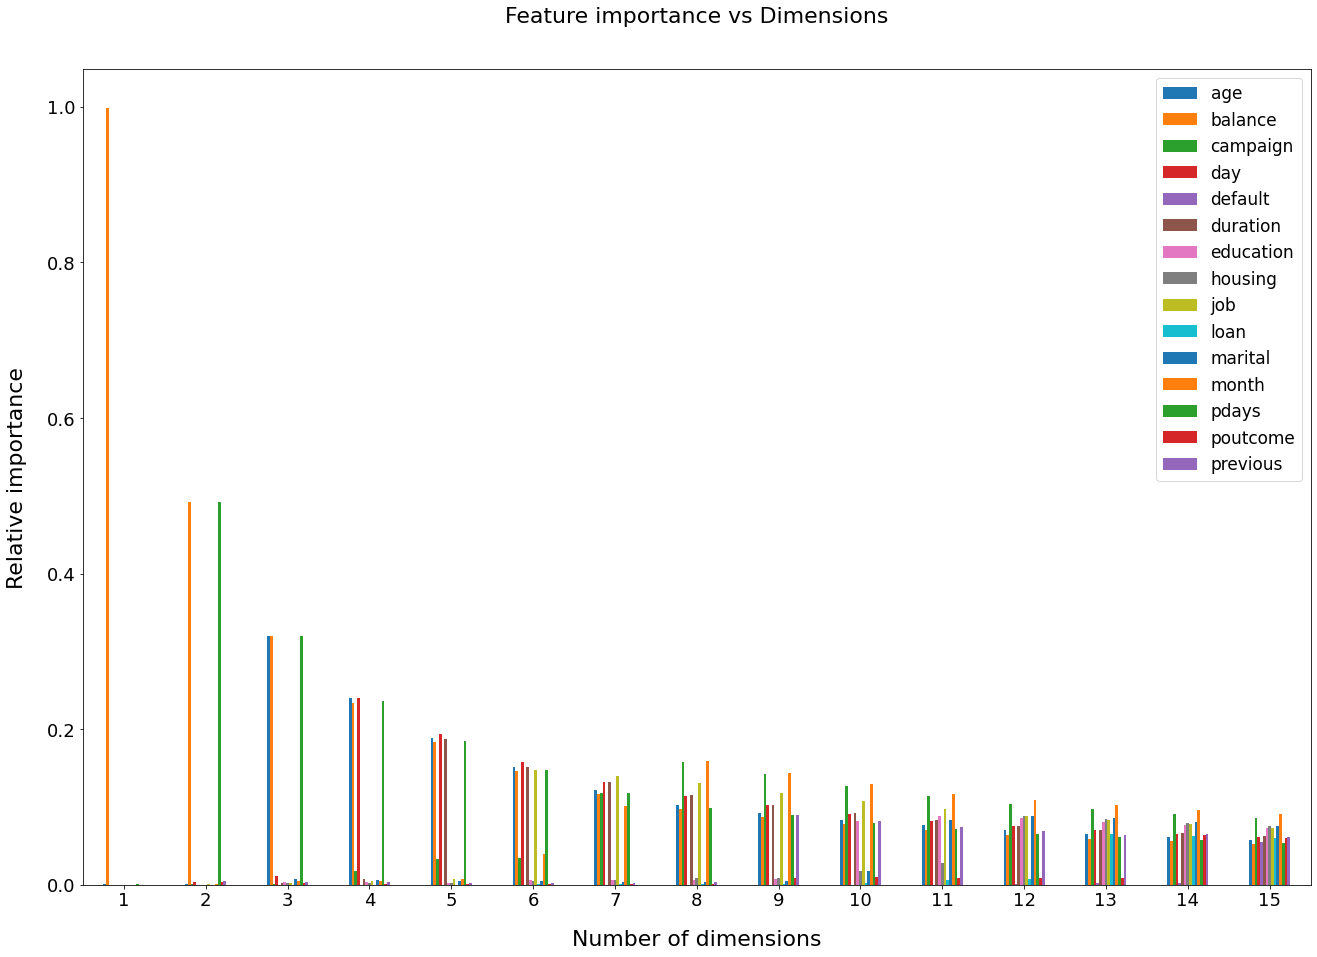

In [57]:
features_df = (pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values'))

ax = features_df.plot(kind='bar', figsize=(22,15))
ax.legend(loc='upper right', fontsize=17)

x_ticks = np.arange(1,16)
ax.set_xticks(x_ticks-1)
ax.set_xticklabels(x_ticks, fontsize=18, rotation=0)

y_ticks = np.round(np.linspace(0.0, 1.0, 6),1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=18)

ax.set_xlabel('Number of dimensions', labelpad=20, fontsize=22)
ax.set_ylabel('Relative importance',labelpad=20, fontsize=22)
ax.set_title('Feature importance vs Dimensions', y=1.05, fontsize=22);

Now I will continue with these 5 columns, which have been highlighted by PCA

In [58]:
data_check = data.loc[:,['balance','campaign','age','pdays','duration','response']]

#### KMeans and Hierarchical Agglomerative Clustering

In [59]:
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data_check.loc[:,data_check.columns!='response'])
data_check['kmeans'] = km.predict(data_check.loc[:,data_check.columns!='response'])

ag = AgglomerativeClustering(n_clusters=2, linkage='single')
ag = ag.fit(data_check.loc[:,data_check.columns!='response'])
data_check['HAG-single'] = ag.fit(data_check.loc[:,data_check.columns!='response'])

Let's give a look at the results.

In [60]:
data_check[['response','kmeans']].groupby(['kmeans','response']).size().to_frame().rename(columns={0:'number'})

number
kmeans response        
0      0          31951
       1           3827
1      0           4251
       1            812

In [61]:
data_check[['response','HAG-single']].groupby(['HAG-single','response']).size().to_frame().rename(columns={0:'number'})

number
HAG-single                                response        
AgglomerativeClustering(linkage='single') 0          36202
                                          1           4639

Both are misclustering, but looks better than the previous subproject.

## Subproject 2 - Conclusions:

I started by applying the classification algorithm of the previous subproject, which was k-NN. Then, I used PCA to reduce the dimensionality, and at the reduced dimesionality-dataset I used claustering methods to cluster the target based on the unlabeled data. In this subproject the clustering methods are giving a bit better results, I would say.